Heading and info about analyzing behavior of large cap tech stocks such as: Apple, Alphabet, Amazon, Meta, Tesla, Nvidia

In [2]:
#Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas_datareader as web

In [3]:
companies = ["AAPL", "GOOG", "AMZN", "META", "TSLA", "MSFT"]
start_date = '2022-01-01'
end_date = '2022-10-31'

In [4]:
data = web.DataReader(companies, 'yahoo', start= start_date, end= end_date)

In [5]:
data.head()

Attributes   Adj Close                                                  \
Symbols           AAPL        GOOG        AMZN        META        TSLA   
Date                                                                     
2022-01-03  181.259933  145.074493  170.404495  338.540009  399.926666   
2022-01-04  178.959457  144.416504  167.522003  336.529999  383.196655   
2022-01-05  174.199142  137.653503  164.356995  324.170013  362.706665   
2022-01-06  171.291183  137.550995  163.253998  332.459991  354.899994   
2022-01-07  171.460495  137.004501  162.554001  331.790009  342.320007   

Attributes                   Close                                      ...  \
Symbols           MSFT        AAPL        GOOG        AMZN        META  ...   
Date                                                                    ...   
2022-01-03  332.577057  182.009995  145.074493  170.404495  338.540009  ...   
2022-01-04  326.874359  179.699997  144.416504  167.522003  336.529999  ...   
2022-01-05  314.326324  174.919998  137.653503  164.356995  324.170013  ...   
2022-01-06  311.842529  172.000000  137.550995  163.253998  332.459991  ...   
2022-01-07  312.001495  172.169998  137.004501  162.554001  331.790009  ...   

Attributes        Open                                           Volume  \
Symbols           AMZN        META        TSLA        MSFT         AAPL   
Date                                                                      
2022-01-03  167.550003  338.299988  382.583344  335.350006  104487900.0   
2022-01-04  170.438004  339.950012  396.516663  334.829987   99310400.0   
2022-01-05  166.882996  333.019989  382.216675  325.859985   94537600.0   
2022-01-06  163.450500  322.820007  359.000000  313.149994   96904000.0   
2022-01-07  163.839005  332.739990  360.123322  314.149994   86709100.0   

Attributes                                                               
Symbols           GOOG        AMZN        META         TSLA        MSFT  
Date                                                                     
2022-01-03  25214000.0  63520000.0  14537900.0  103931400.0  28865100.0  
2022-01-04  22928000.0  70726000.0  15998000.0  100248300.0  32674300.0  
2022-01-05  49642000.0  64302000.0  20564500.0   80119800.0  40054300.0  
2022-01-06  29050000.0  51958000.0  27962800.0   90336600.0  39646100.0  
2022-01-07  19408000.0  46606000.0  14722000.0   84164700.0  32720000.0  

[5 rows x 36 columns]

Just get the adjusted prices to clean things up: 

In [6]:
adjClosing = data['Adj Close']
adjClosing.head()

Symbols,AAPL,GOOG,AMZN,META,TSLA,MSFT
Date,,,,,,
2022-01-03,181.259933,145.074493,170.404495,338.540009,399.926666,332.577057
2022-01-04,178.959457,144.416504,167.522003,336.529999,383.196655,326.874359
2022-01-05,174.199142,137.653503,164.356995,324.170013,362.706665,314.326324
2022-01-06,171.291183,137.550995,163.253998,332.459991,354.899994,311.842529
2022-01-07,171.460495,137.004501,162.554001,331.790009,342.320007,312.001495


Plot the data

<AxesSubplot: xlabel='Date'>

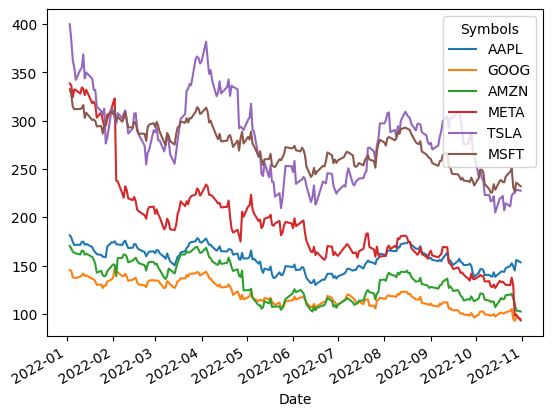

In [7]:
adjClosing.plot()


Convert the Data to price changes to make better infrences

<AxesSubplot: xlabel='Date'>

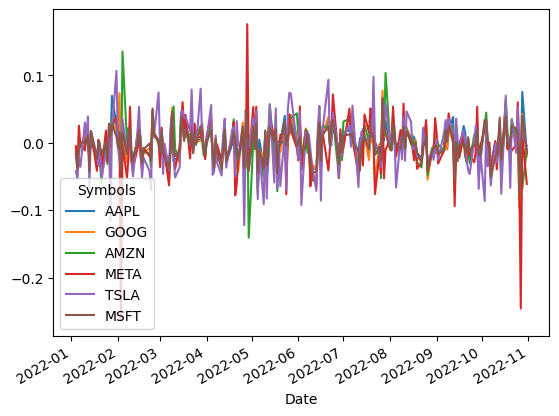

In [8]:
pcts = adjClosing.pct_change()
pcts.plot()

This is useless so lets separate them

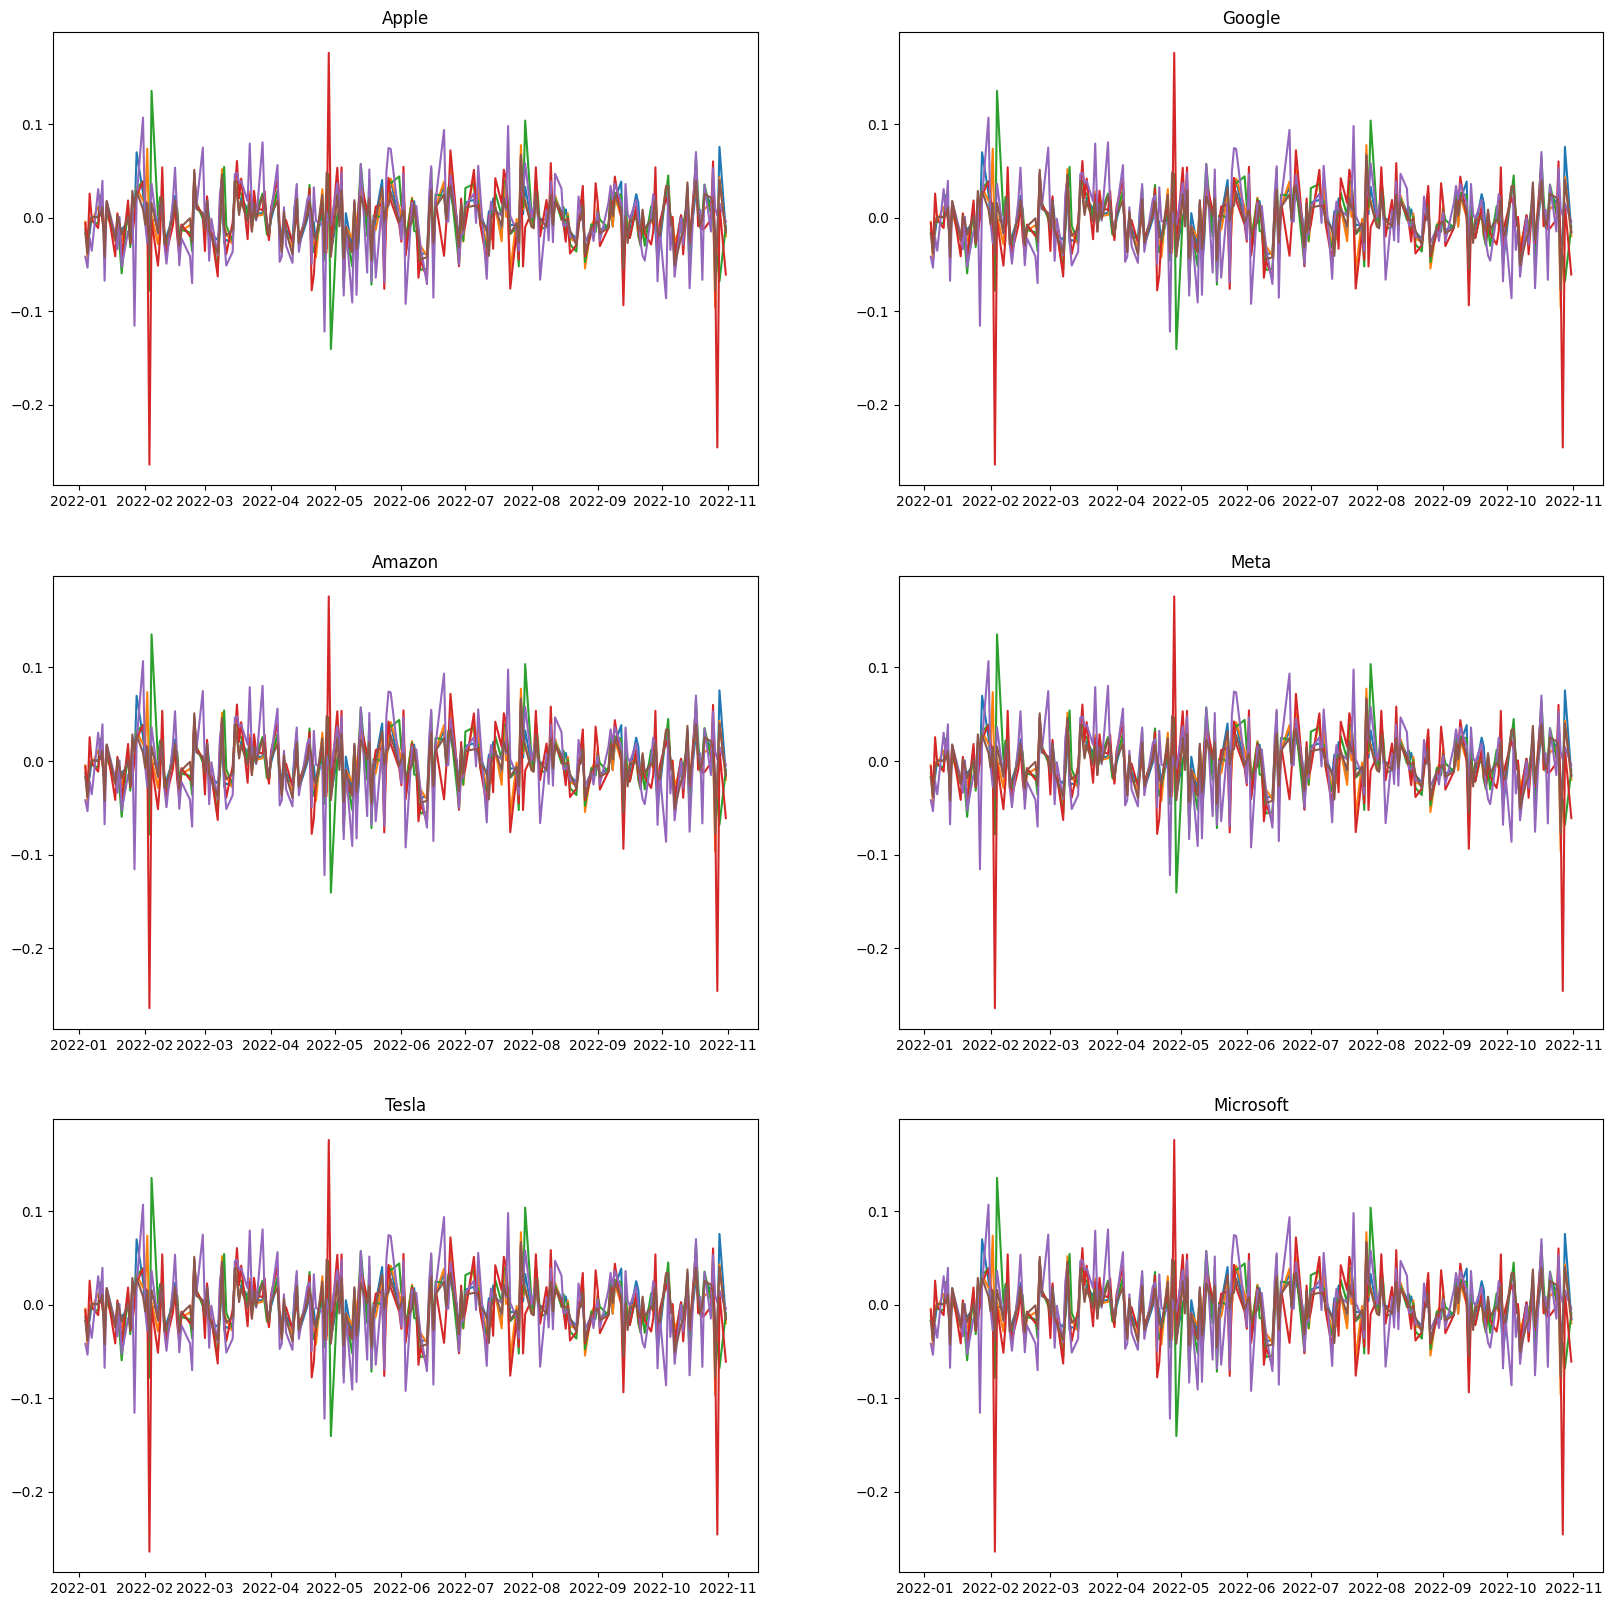

In [9]:
figures = plt.figure(figsize=(20,20))
plt_AAPL = figures.add_subplot(3,2,1)
plt_GOOG = figures.add_subplot(3,2,2)
plt_AMZN = figures.add_subplot(3,2,3)
plt_META = figures.add_subplot(3,2,4)
plt_TSLA = figures.add_subplot(3,2,5)
plt_MSFT = figures.add_subplot(3,2,6)

plt_AAPL.plot(pcts)
plt_AAPL.set_title("Apple")
plt_GOOG.plot(pcts) 
plt_GOOG.set_title("Google")
plt_AMZN.plot(pcts) 
plt_AMZN.set_title("Amazon")
plt_META.plot(pcts) 
plt_META.set_title("Meta")
plt_TSLA.plot(pcts)
plt_TSLA.set_title("Tesla") 
plt_MSFT.plot(pcts)
plt_MSFT.set_title("Microsoft")

plt.show()

Now lets look into the standard deviations

In [19]:
std_devs = pcts.std()
comps = std_devs.keys()
values = []
for vals in std_devs.keys():
    values.append(std_devs[vals])

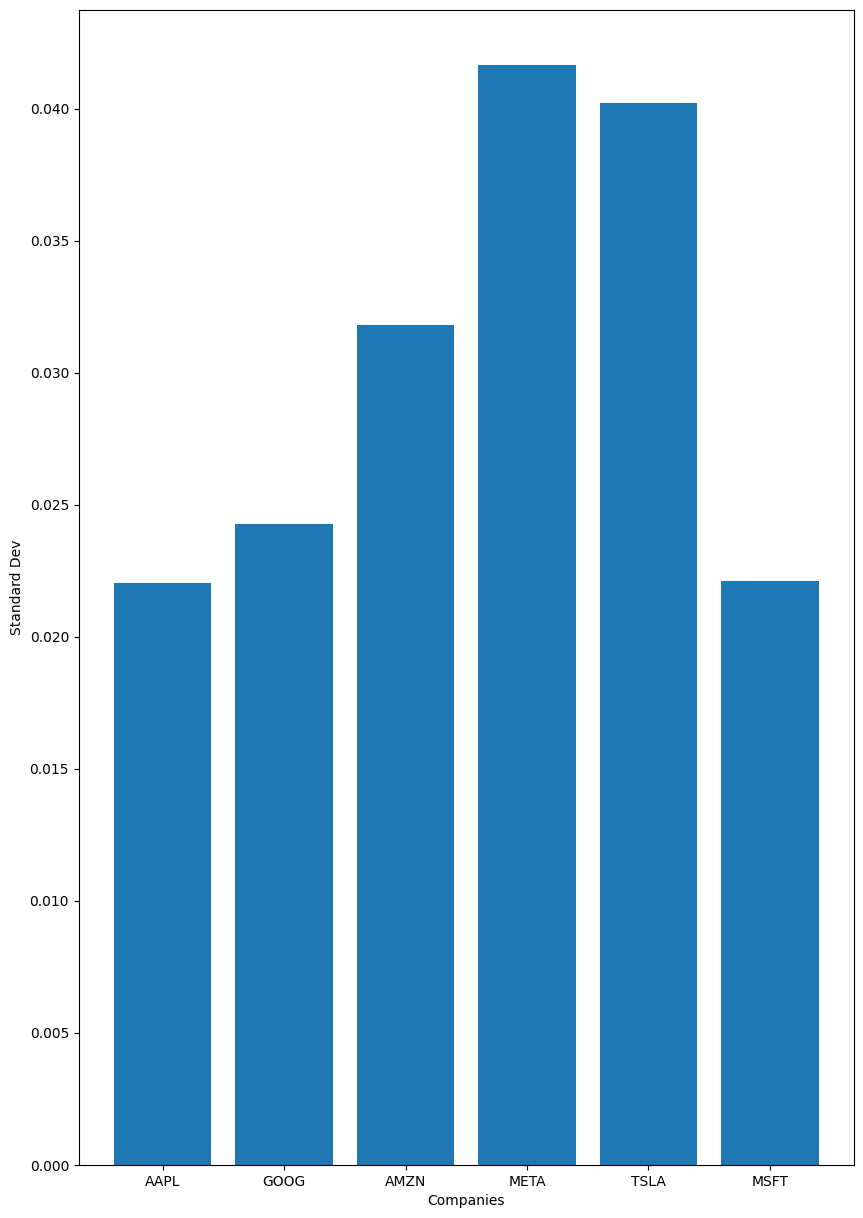

In [20]:
barPlt = plt.figure(figsize=(10,15))
plt.bar(comps, values)
plt.xlabel("Companies")
plt.ylabel("Standard Dev")
plt.show()

Correlation?

In [21]:
pcts.corr()

Symbols,AAPL,GOOG,AMZN,META,TSLA,MSFT
Symbols,,,,,,
AAPL,1.000000,0.774158,0.662273,0.591900,0.675205,0.815391
GOOG,0.774158,1.000000,0.697141,0.680339,0.590059,0.834637
AMZN,0.662273,0.697141,1.000000,0.609976,0.610908,0.717855
META,0.591900,0.680339,0.609976,1.000000,0.436590,0.611712
TSLA,0.675205,0.590059,0.610908,0.436590,1.000000,0.609623
MSFT,0.815391,0.834637,0.717855,0.611712,0.609623,1.000000
